# Statsmodel formula

# import

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm


# load data

In [45]:
df_raw = pd.read_csv('Guerry.csv')
df_raw

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,86,W,Vienne,15010,4710,25,8922,35224,21851,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,83,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,84,88,E,Vosges,18835,9044,62,4040,14978,33029,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,85,89,C,Yonne,18006,6516,47,4276,16616,12789,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [34]:
df_raw.columns

Index(['Unnamed: 0', 'dept', 'Region', 'Department', 'Crime_pers',
       'Crime_prop', 'Literacy', 'Donations', 'Infants', 'Suicides',
       'MainCity', 'Wealth', 'Commerce', 'Clergy', 'Crime_parents',
       'Infanticide', 'Donation_clergy', 'Lottery', 'Desertion', 'Instruction',
       'Prostitutes', 'Distance', 'Area', 'Pop1831'],
      dtype='object')

In [ ]:
df = df_raw[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E
...,...,...,...,...
80,68,28,56,W
81,40,25,68,W
82,55,13,67,C
83,14,62,82,E


# simulation

In [49]:


def generate_habitants_data(n=300, seed=42):
    np.random.seed(seed)

    villes = ['toulouse', 'lyon', 'paris', 'montpelier', 'neuilly']
    df = pd.DataFrame()
    df['ville'] = np.random.choice(villes, size=n)

    # Mappings pour effets simulés
    bolas_base = {
        'neuilly': 20,
        'paris': 35,
        'lyon': 50,
        'montpelier': 65,
        'toulouse': 80
    }

    classe_base = {
        'neuilly': 80,
        'paris': 70,
        'montpelier': 60,
        'toulouse': 50,
        'lyon': 90
    }

    coquetterie_base = {
        'neuilly': 90,
        'paris': 75,
        'lyon': 60,
        'montpelier': 45,
        'toulouse': 30
    }



    # Niveau de code de base
    df['niveau_code'] = np.random.randint(0, 101, size=n)

    # Génération des variables avec effets
    df['niveau_bolas'] = df.apply(
        lambda row: bolas_base[row['ville']] + np.random.normal(0, 10), axis=1
    )
    df['niveau_bolas'] = df['niveau_bolas'].clip(0, 100)

    # Apétance pour la Kro dépend positivement du jonglage au bolas
    df['appetance_kro'] = df['niveau_bolas'] + np.random.normal(0, 10, size=n)
    df['appetance_kro'] = df['appetance_kro'].clip(0, 100)

    # Niveau de classe basé sur la ville
    df['niveau_classe'] = df.apply(
        lambda row: classe_base[row['ville']] + np.random.normal(0, 10), axis=1
    )
    df['niveau_classe'] = df['niveau_classe'].clip(0, 100)

    # Niveau de coquetterie inverse du niveau de classe
    df['niveau_coquetterie'] = df.apply(
        lambda row: coquetterie_base[row['ville']] + np.random.normal(0, 10), axis=1
    )
    df['niveau_coquetterie'] = df['niveau_coquetterie'].clip(0, 100)


    # Simuler un effet du niveau de code sur chaque ville (effet ligneaire avec baseline par ville)
    ville_code_slopes = {
        'neuilly': 0.3,
        'paris': 0.4,
        'lyon': 0.5,
        'montpelier': 0.6,
        'toulouse': 0.7
    }

    df['niveau_tech_global'] = df.apply(
        lambda row: row['niveau_code'] * ville_code_slopes[row['ville']] + np.random.normal(0, 5), axis=1
    )
    df['niveau_tech_global'] = df['niveau_tech_global'].clip(0, 100)
    df.drop(columns=['niveau_code'], inplace=True)
    df.rename(columns={'niveau_tech_global': 'niveau_code'}, inplace=True)

    return df

# Exemple d'utilisation
df_code = generate_habitants_data()
df_code


,ville,niveau_bolas,appetance_kro,niveau_classe,niveau_coquetterie,niveau_code
0,montpelier,70.591092,55.563442,69.505028,55.310629,22.628432
1,neuilly,28.725416,26.118064,76.570242,91.085427,5.007730
2,paris,46.543543,35.289353,75.055018,79.626263,22.443587
3,neuilly,15.226183,13.735816,79.710751,100.000000,12.695475
4,neuilly,13.357726,13.291191,82.696694,78.273967,20.100885
...,...,...,...,...,...,...
295,neuilly,0.000000,0.000000,78.024648,94.017713,17.294693
296,neuilly,17.701204,10.592485,72.409596,88.078889,5.507693
297,paris,41.281400,34.590189,70.334588,88.904998,18.782982
298,montpelier,77.701255,78.443318,53.781817,33.885870,24.891755


In [50]:
df_code.to_excel('df_classecoquetterie.xlsx', index=False)

# Formules à la sauce R = Wilkinson Notation


Voir **pasty** https://patsy.readthedocs.io/en/latest/formulas.html

In [10]:
import statsmodels.formula.api as smf

##avec un ~ pour definir qui en fonction de qui
my_formula = "Lottery ~ Literacy"


### on definit la regression : ols = Ordinary Least Square pour optimiser la regression linaire
### (c'est le modele de regression dans R également)
mod = smf.ols(formula=my_formula, data=df)

### on estime (fit) le model
res_ols = mod.fit()
print (res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.16
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           0.000312
Time:                        09:05:05   Log-Likelihood:                -386.13
No. Observations:                  85   AIC:                             776.3
Df Residuals:                      83   BIC:                             781.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2389      6.163     10.423      0.0

<Axes: xlabel='Lottery', ylabel='Literacy'>

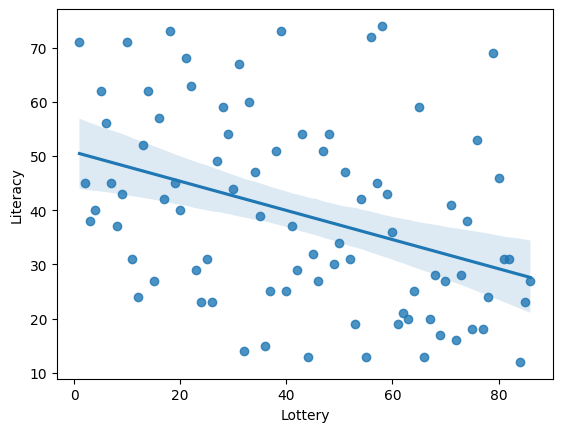

In [11]:
sns.regplot(data=df, x="Lottery", y="Literacy")

In [13]:
##pour definir un modele avec plusieurs variables, on utilise le '+'
my_full_formula = "Lottery ~ Literacy + Wealth"

full_mod = smf.ols(formula=my_full_formula, data=df)

### on estime (fit) le model
full_res_ols = full_mod.fit()
print (full_res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     18.32
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.66e-07
Time:                        09:09:01   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             760.3
Df Residuals:                      82   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7979      7.873      5.055      0.0

In [22]:
##pour definir un modele avec plusieurs variables, on utilise le '+'
my_full_formula = "Lottery ~ Literacy * Wealth"

full_mod = smf.ols(formula=my_full_formula, data=df)

### on estime (fit) le model
full_res_ols = full_mod.fit()
print (full_res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.32e-06
Time:                        09:26:53   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

Rq: on peut aussi specifier TOUTES les interactions que l'on veut tester en mettant
my_formula = "Lottery ~ Literacy + Region + Literacy:Region + Wealth +  Wealth:Region + Literacy:Wealth + Literacy:Wealth:Region"

ceci revient au meme que 'Literacy * Wealth * Region'

### ANOVA simple

ANOVA Results:
                sum_sq    df         F    PR(>F)
Region     7307.011765   4.0  3.312945  0.014534
Residual  44111.882353  80.0       NaN       NaN

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     C      E -18.7059 0.1485  -41.185  3.7732  False
     C      N -25.7647 0.0165 -48.2438 -3.2856   True
     C      S  -5.7647 0.9523 -28.2438 16.7144  False
     C      W  -8.4118 0.8339 -30.8908 14.0673  False
     E      N  -7.0588 0.9047 -29.5379 15.4202  False
     E      S  12.9412 0.4976  -9.5379 35.4202  False
     E      W  10.2941 0.7053  -12.185 32.7732  False
     N      S     20.0 0.1048  -2.4791 42.4791  False
     N      W  17.3529 0.2078  -5.1261  39.832  False
     S      W  -2.6471 0.9974 -25.1261  19.832  False
-----------------------------------------------------


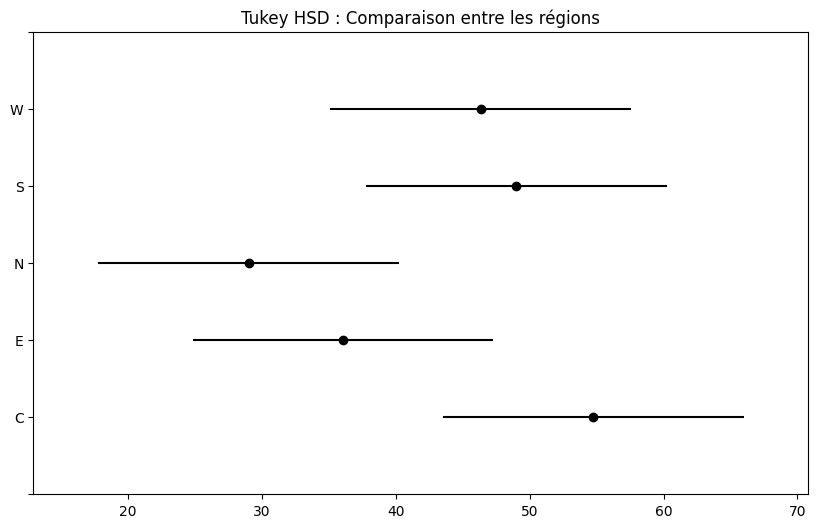

In [ ]:
# 1. ANOVA
anova_model = smf.ols("Lottery ~ Region", data=df).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)

# 2. Post-hoc Tukey HSD
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df["Lottery"], groups=df["Region"], alpha=0.05)
print("\nTukey HSD Results:")
print(tukey)

tukey.plot_simultaneous()
plt.title("Tukey HSD : Comparaison entre les régions")
plt.show()



In [23]:
# 1. Modèle de régression
anova_model = smf.ols("Lottery ~ Region", data=df).fit()

# 2. ANOVA
anova_results = sm.stats.anova_lm(anova_model, typ=2)

# Affichage des résultats de l'ANOVA
print(anova_results)

                sum_sq    df         F    PR(>F)
Region     7307.011765   4.0  3.312945  0.014534
Residual  44111.882353  80.0       NaN       NaN


# LMM (linear mixte model)

In [42]:
df_raw = df_raw.dropna()
# Syntaxe pour un modèle à effets mixtes avec effet aléatoire sur 'Region'
mixed_mod = smf.mixedlm("Instruction ~ Wealth", data=df_raw, groups=df["Region"])
mixed_res = mixed_mod.fit()
print(mixed_res.summary())


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Instruction
No. Observations: 85      Method:             REML       
No. Groups:       5       Scale:              271.3473   
Min. group size:  17      Log-Likelihood:     -364.2459  
Max. group size:  17      Converged:          Yes        
Mean group size:  17.0                                   
----------------------------------------------------------
            Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   34.451     9.420  3.657  0.000  15.988  52.915
Wealth       0.204     0.079  2.594  0.009   0.050   0.358
Group Var  369.023    16.957                              



<Figure size 1000x600 with 0 Axes>

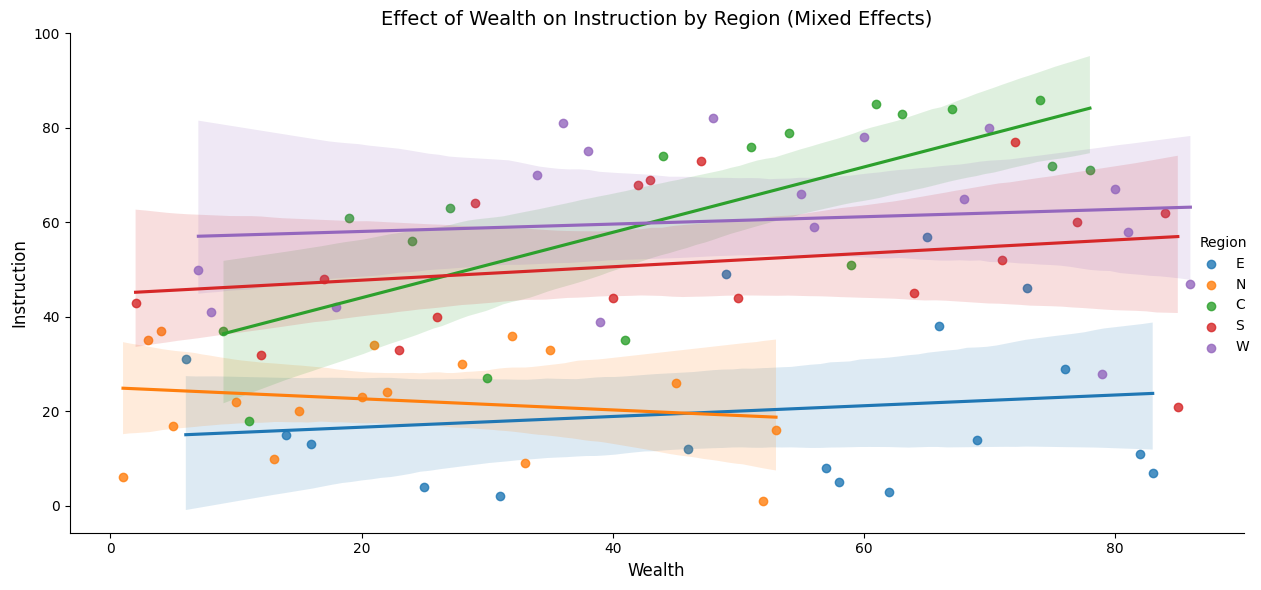

In [43]:
plt.figure(figsize=(10, 6))

# Visualizing the relationship between Wealth and Instruction
sns.lmplot(data=df_raw, x="Wealth", y="Instruction", hue="Region", aspect=2, height=6, logistic=False)

# Adding plot title and labels
plt.title('Effect of Wealth on Instruction by Region (Mixed Effects)', fontsize=14)
plt.xlabel('Wealth', fontsize=12)
plt.ylabel('Instruction', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

# Exercice

Etude sur la différence entre la classe et la coquetterie ?

In [53]:
df_cc = pd.read_excel('df_classecoquetterie.xlsx')
df_cc

,ville,niveau_bolas,appetance_kro,niveau_classe,niveau_coquetterie,niveau_code
0,montpelier,70.591092,55.563442,69.505028,55.310629,22.628432
1,neuilly,28.725416,26.118064,76.570242,91.085427,5.007730
2,paris,46.543543,35.289353,75.055018,79.626263,22.443587
3,neuilly,15.226183,13.735816,79.710751,100.000000,12.695475
4,neuilly,13.357726,13.291191,82.696694,78.273967,20.100885
...,...,...,...,...,...,...
295,neuilly,0.000000,0.000000,78.024648,94.017713,17.294693
296,neuilly,17.701204,10.592485,72.409596,88.078889,5.507693
297,paris,41.281400,34.590189,70.334588,88.904998,18.782982
298,montpelier,77.701255,78.443318,53.781817,33.885870,24.891755


In [58]:
##avec un ~ pour definir qui en fonction de qui
my_formula = "niveau_bolas ~ appetance_kro"


### on definit la regression : ols = Ordinary Least Square pour optimiser la regression linaire
### (c'est le modele de regression dans R également)
mod = smf.ols(formula=my_formula, data=df_cc)

### on estime (fit) le model
res_ols = mod.fit()
print (res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           niveau_bolas   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1710.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          1.80e-125
Time:                        10:07:37   Log-Likelihood:                -1081.9
No. Observations:                 300   AIC:                             2168.
Df Residuals:                     298   BIC:                             2175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7907      1.189      7.391

<Axes: xlabel='niveau_bolas', ylabel='appetance_kro'>

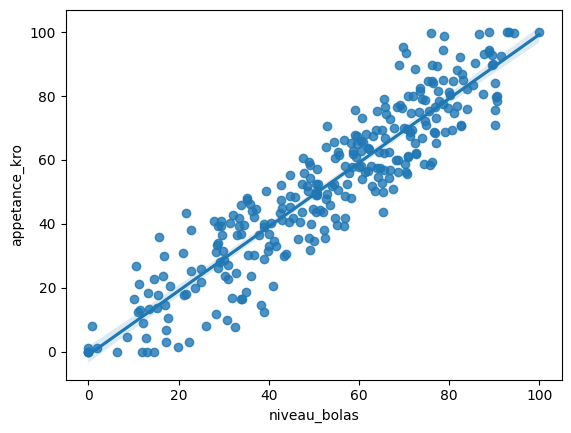

In [59]:
sns.regplot(data=df_cc, x="niveau_bolas", y="appetance_kro")

In [55]:
# Modèle à effets mixtes avec effets aléatoires par ville
mixed_model = smf.mixedlm("niveau_bolas ~ niveau_code + appetance_kro + niveau_classe + niveau_coquetterie", 
                          data=df_cc, 
                          groups=df_cc["ville"])

# Estimation du modèle
mixed_result = mixed_model.fit()

# Résultats du modèle
print(mixed_result.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  niveau_bolas
No. Observations:   300      Method:              REML        
No. Groups:         5        Scale:               49.8122     
Min. group size:    46       Log-Likelihood:      -1029.4547  
Max. group size:    74       Converged:           Yes         
Mean group size:    60.0                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           23.526    6.877  3.421 0.001 10.046 37.005
niveau_code         -0.015    0.025 -0.588 0.557 -0.063  0.034
appetance_kro        0.529    0.030 17.628 0.000  0.470  0.587
niveau_classe        0.000    0.043  0.008 0.994 -0.085  0.085
niveau_coquetterie   0.020    0.044  0.468 0.640 -0.065  0.106
Group Var          138.408   14.647                           



<Figure size 1000x600 with 0 Axes>

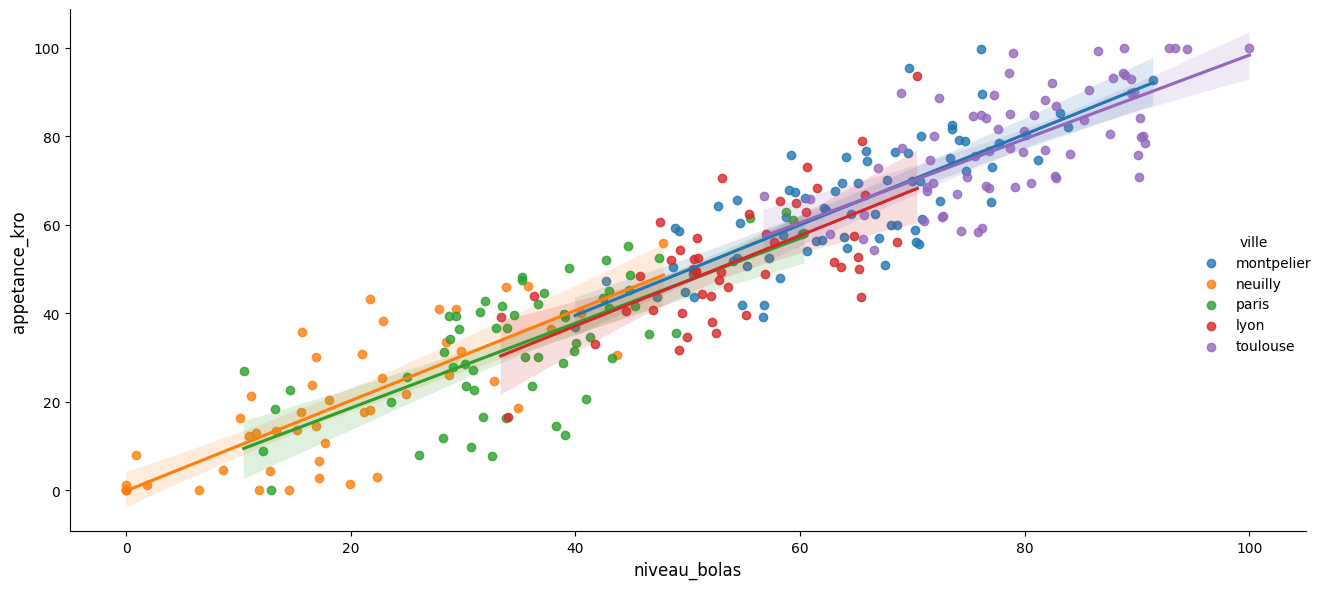

In [61]:
plt.figure(figsize=(10, 6))

# Visualizing the relationship between Wealth and Instruction
sns.lmplot(data=df_cc, x="niveau_bolas", y="appetance_kro", hue="ville", aspect=2, height=6, logistic=False)

plt.xlabel('niveau_bolas', fontsize=12)
plt.ylabel('appetance_kro', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [65]:
# Modèle à effets mixtes avec effets aléatoires par ville
mixed_model = smf.mixedlm("niveau_coquetterie ~ niveau_code + niveau_classe", 
                          data=df_cc, 
                          groups=df_cc["ville"])

# Estimation du modèle
mixed_result = mixed_model.fit()

# Résultats du modèle
print(mixed_result.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: niveau_coquetterie
No. Observations: 300     Method:             REML              
No. Groups:       5       Scale:              93.3912           
Min. group size:  46      Log-Likelihood:     -1120.3908        
Max. group size:  74      Converged:          Yes               
Mean group size:  60.0                                          
-----------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept          57.320    11.190  5.122  0.000  35.388  79.253
niveau_code         0.020     0.034  0.588  0.557  -0.046   0.086
niveau_classe       0.023     0.059  0.389  0.697  -0.093   0.139
Group Var         536.742    39.720                              

